<a href="https://colab.research.google.com/github/thhtruc/NeuralNetwork/blob/main/NN_pytorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Neural Network

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'


import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

#define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
#download and load the training data
trainset = datasets.MNIST('TRAIN_SET', download=True, train=True, transform=transform)
valset = datasets.MNIST('VAL_SET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### the batch size is the number of images we get in one iteration from data loader
# and pass through network
### Shuffle=True - shuffle the dataset everytime we start going through the data loader again


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting TRAIN_SET/MNIST/raw/train-images-idx3-ubyte.gz to TRAIN_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting TRAIN_SET/MNIST/raw/train-labels-idx1-ubyte.gz to TRAIN_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting TRAIN_SET/MNIST/raw/t10k-images-idx3-ubyte.gz to TRAIN_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting TRAIN_SET/MNIST/raw/t10k-labels-idx1-ubyte.gz to TRAIN_SET/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting VAL_SET/MNIST/raw/train-images-idx3-ubyte.gz to VAL_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting VAL_SET/MNIST/raw/train-labels-idx1-ubyte.gz to VAL_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting VAL_SET/MNIST/raw/t10k-images-idx3-ubyte.gz to VAL_SET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting VAL_SET/MNIST/raw/t10k-labels-idx1-ubyte.gz to VAL_SET/MNIST/raw



In [ ]:
from torch import nn, optim
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9551047795871173
Training loss: 0.8822723391023017
Training loss: 0.5371211441213897
Training loss: 0.43291157696928295
Training loss: 0.3847371178077482


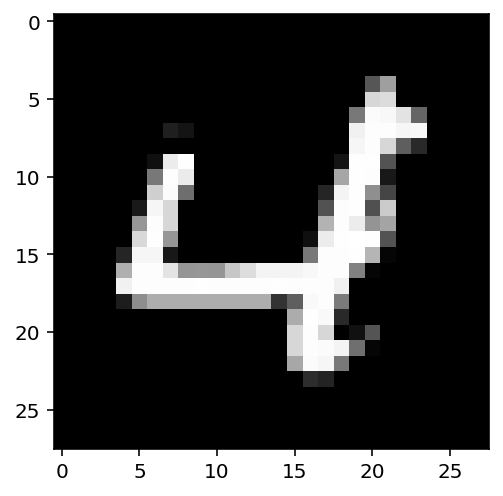

predict tensor(4)


In [ ]:
%matplotlib inline
import torch.nn.functional as F

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits, dim=1)
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')
plt.show()
print('predict', torch.argmax(ps))